# Question 2: Clustering

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

d = fetch_openml('usps', version=2, as_frame=False)  # as_frame=False -> numpy arrays
Xtrain = np.asarray(d['data'], dtype=np.float32)
Ytrain = np.asarray(d['target'], dtype=np.int32)-1

### Data plotting function

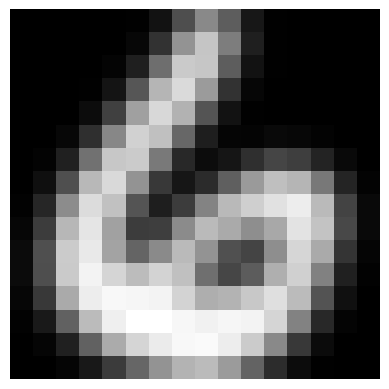

In [4]:
def plot(x):
    plt.imshow(x.reshape(16, 16), cmap="gray")
    plt.axis(False)

plot(Xtrain[0, :])

### Question 1(a): Cluster Centers

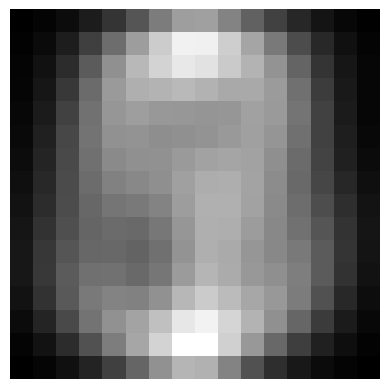

In [ ]:
def cluster_center(X, ind):
    ind = np.asarray(ind, dtype=int)
    if ind.size == 0:
        raise ValueError("Cluster index list is empty")
    return np.mean(X[ind], axis=0)

mu = cluster_center(Xtrain, np.arange(Xtrain.shape[0]))
plot(mu)

### Question 1(b): Cluster Objective

In [ ]:
def cluster_objective(centers, X, z):
    centers, X, z = np.asarray(centers), np.asarray(X), np.asarray(z, dtype=int)

    if centers.ndim == 1:
        centers = centers[None, :]
    if X.shape[0] != z.shape[0]:
        raise ValueError("Must be same length")

    diffs = X - centers[z]
    return float(np.sum(np.square(diffs)))

num_train = Xtrain.shape[0]
z_1 = np.zeros(num_train, dtype=int)
obj_val_1 = cluster_objective(mu, Xtrain, z_1)
print(f"Single-cluster objective value: {obj_val_1:.2f}")

Single-cluster objective value: 631481.56


### Question 1(c): K-Means

K-Means objective value: 338838.72


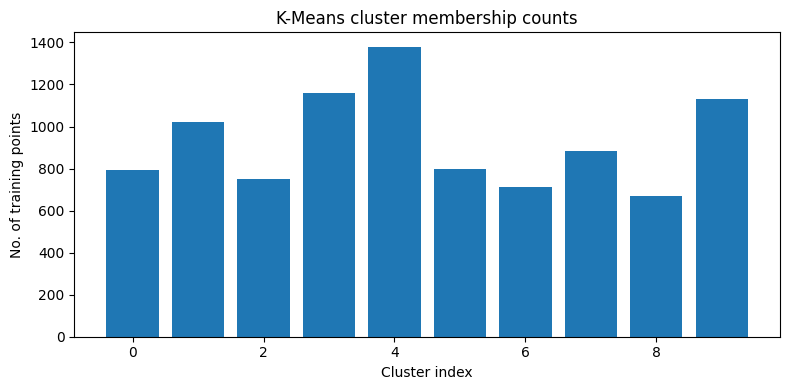

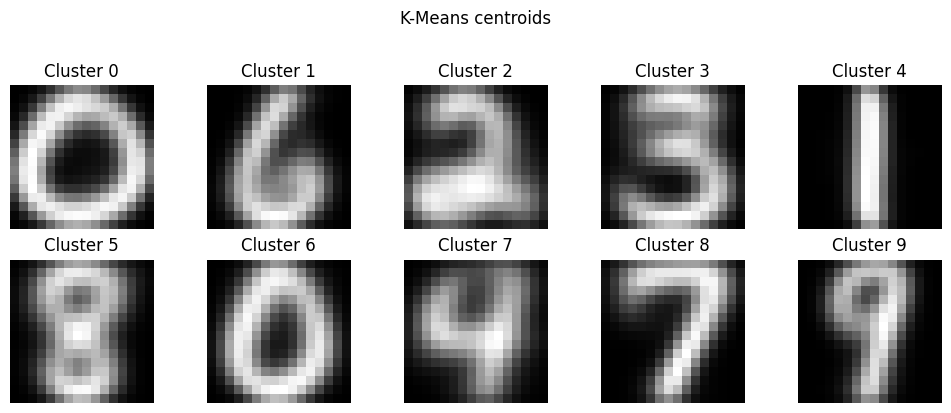

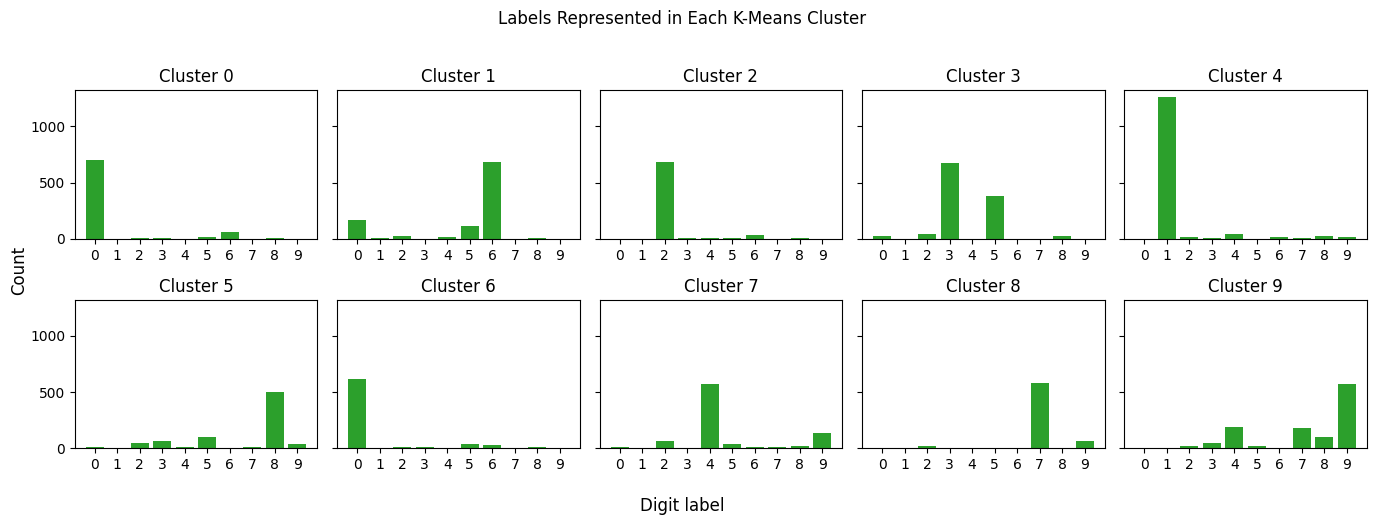

In [ ]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, n_init=20, random_state=1)
kmeans.fit(Xtrain)
z_2 = kmeans.predict(Xtrain)
km_centers = []
for i in range(num_clusters):
    members = np.where(z_2 == i)[0]
    if members.size == 0:
        km_centers.append(np.zeros(Xtrain.shape[1]))
    else:
        km_centers.append(cluster_center(Xtrain, members))
km_centers = np.vstack(km_centers)
obj_val_2 = cluster_objective(km_centers, Xtrain, z_2)
print(f"K-Means objective value: {obj_val_2:.2f}")

size_clusters = np.bincount(z_2, minlength=num_clusters)
plt.figure(figsize=(8, 4))
plt.bar(range(num_clusters), size_clusters, color='tab:blue')
plt.xlabel('Cluster index')
plt.ylabel('No. of training points')
plt.title('K-Means cluster membership counts')
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, a in enumerate(axes.flat):
    if i < num_clusters:
        a.imshow(km_centers[i].reshape(16, 16), cmap='gray')
        a.set_title(f'Cluster {i}')
    a.axis('off')
plt.suptitle('K-Means centroids', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(14, 5), sharey=True)
labels_list = np.arange(10)
for i, a in enumerate(axes.flat):
    if i < num_clusters:
        mems = Ytrain[z_2 == i]
        if mems.size == 0:
            label_counts = np.zeros(labels_list.size)
        else:
            label_counts = np.bincount(mems, minlength=labels_list.size)
        a.bar(labels_list, label_counts, color='tab:green')
        a.set_title(f'Cluster {i}')
        a.set_xticks(labels_list)
    else:
        a.axis('off')
fig.supylabel('Count')
fig.supxlabel('Digit label')
fig.suptitle('Labels Represented in Each K-Means Cluster', y=1.02)
plt.tight_layout()
plt.show()

### Question 1(d): Hierarchical Clustering

Agglomerative clustering objective value: 561044.19


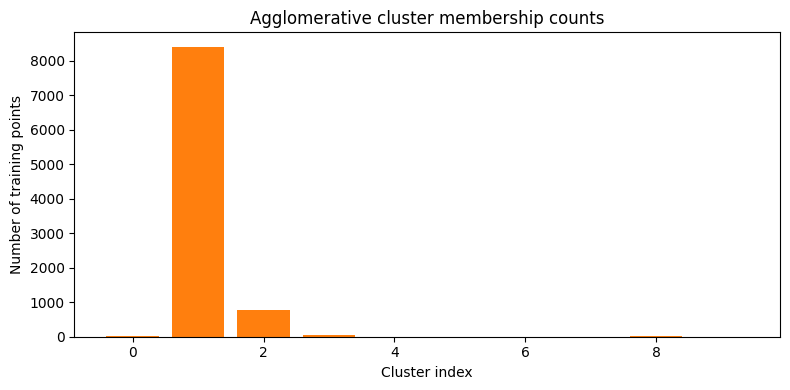

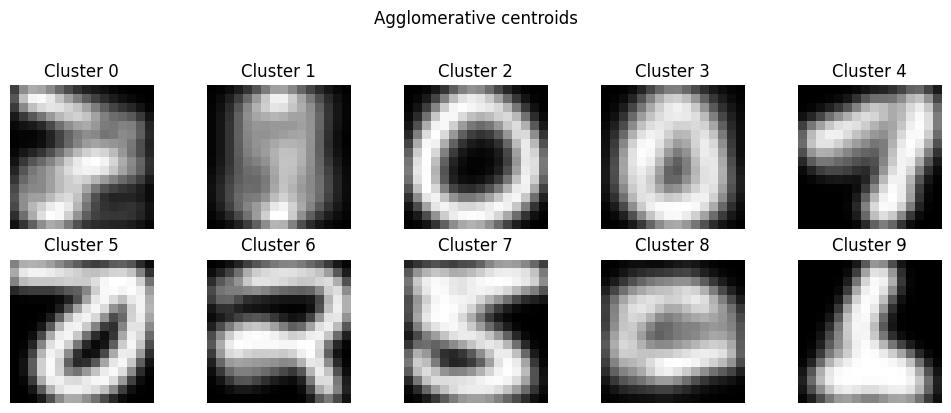

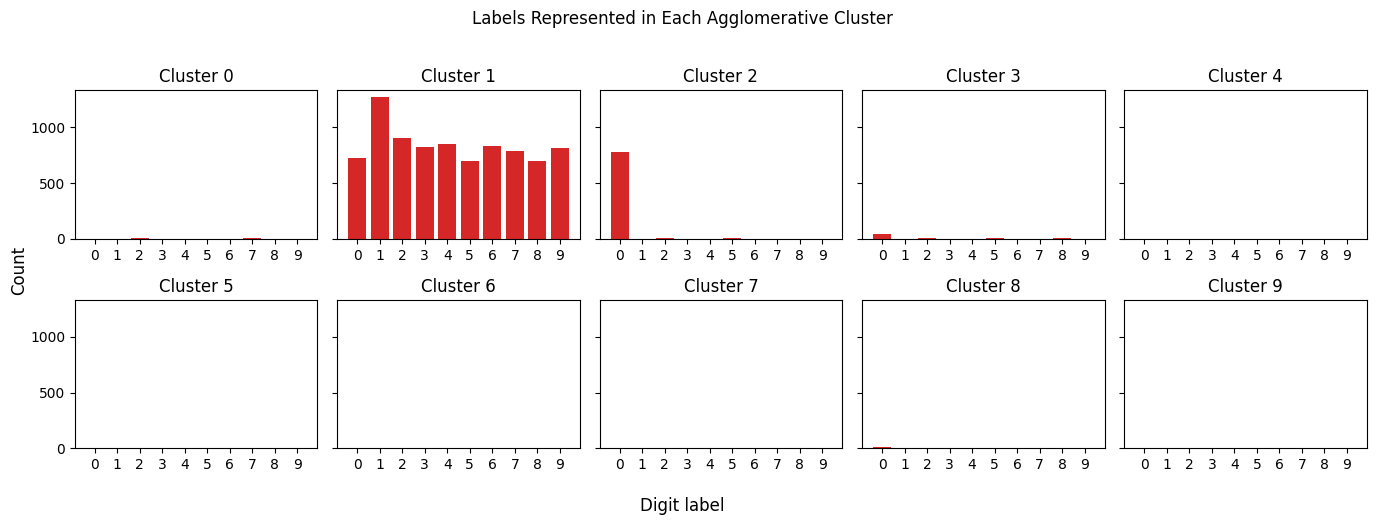

In [ ]:
agglo = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')
z_agg = agglo.fit_predict(Xtrain)
agg_c_list = []
for i in range(num_clusters):
    indexes = np.where(z_agg == i)[0]
    if indexes.size == 0:
        agg_c_list.append(np.zeros(Xtrain.shape[1]))
    else:
        agg_c_list.append(cluster_center(Xtrain, indexes))
agg_c_list = np.vstack(agg_c_list)
obj_val_3 = cluster_objective(agg_c_list, Xtrain, z_agg)
print(f"Agglomerative clustering objective value: {obj_val_3:.2f}")

agg_size_clusters = np.bincount(z_agg, minlength=num_clusters)
plt.figure(figsize=(8, 4))
plt.bar(range(num_clusters), agg_size_clusters, color='tab:orange')
plt.xlabel('Cluster index')
plt.ylabel('Number of training points')
plt.title('Agglomerative cluster membership counts')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, a in enumerate(axes.flat):
    if i < num_clusters:
        a.imshow(agg_c_list[i].reshape(16, 16), cmap='gray')
        a.set_title(f'Cluster {i}')
    a.axis('off')
plt.suptitle('Agglomerative centroids', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(14, 5), sharey=True)
lab_list = np.arange(10)
for i, a in enumerate(axes.flat):
    if i < num_clusters:
        members = Ytrain[z_agg == i]
        if members.size == 0:
            label_counts = np.zeros(lab_list.size)
        else:
            label_counts = np.bincount(members, minlength=lab_list.size)
        a.bar(lab_list, label_counts, color='tab:red')
        a.set_title(f'Cluster {i}')
        a.set_xticks(lab_list)
    else:
        a.axis('off')
fig.supylabel('Count')
fig.supxlabel('Digit label')
fig.suptitle('Labels Represented in Each Agglomerative Cluster', y=1.02)
plt.tight_layout()
plt.show()